<a href="https://colab.research.google.com/github/Aryabs1650/feynn-labs-intern/blob/main/VP(clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/jfk_weather_cleaned (1).csv')


df.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,01-01-2010 00:51,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,01-01-2010 01:51,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,01-01-2010 02:51,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,01-01-2010 03:51,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,01-01-2010 04:51,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75083 entries, 0 to 75082
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              75083 non-null  object 
 1   VISIBILITY        75083 non-null  float64
 2   DRYBULBTEMPF      75083 non-null  int64  
 3   WETBULBTEMPF      75083 non-null  int64  
 4   DewPointTempF     75083 non-null  int64  
 5   RelativeHumidity  75083 non-null  int64  
 6   WindSpeed         75083 non-null  int64  
 7   WindDirection     75083 non-null  int64  
 8   StationPressure   75083 non-null  float64
 9   SeaLevelPressure  75083 non-null  float64
 10  Precip            75083 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


In [ ]:
## checking for missing value
df.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VISIBILITY,75083.0,9.211896,2.202311,0.00,10.00,10.00,10.00,14.00
DRYBULBTEMPF,75083.0,55.355527,17.394334,1.00,42.00,56.00,70.00,102.00
WETBULBTEMPF,75083.0,49.327544,16.182867,-1.00,36.00,50.00,64.00,85.00
DewPointTempF,75083.0,42.424024,19.577957,-19.00,27.00,44.00,59.00,84.00
RelativeHumidity,75083.0,64.812075,19.898962,8.00,49.00,66.00,82.00,100.00
WindSpeed,75083.0,11.253240,6.101048,0.00,7.00,10.00,15.00,53.00
WindDirection,75083.0,196.550751,107.692804,0.00,110.00,200.00,290.00,360.00
StationPressure,75083.0,30.005579,0.235172,28.52,29.86,30.00,30.15,30.83
SeaLevelPressure,75083.0,30.026049,0.234069,28.54,29.88,30.02,30.17,30.85
Precip,75083.0,0.005478,0.036161,0.00,0.00,0.00,0.00,2.41


In [ ]:
# extraction of date
df['DATE'] = pd.to_datetime(df['DATE'])

df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.dayofweek
df['hour'] = df['DATE'].dt.hour

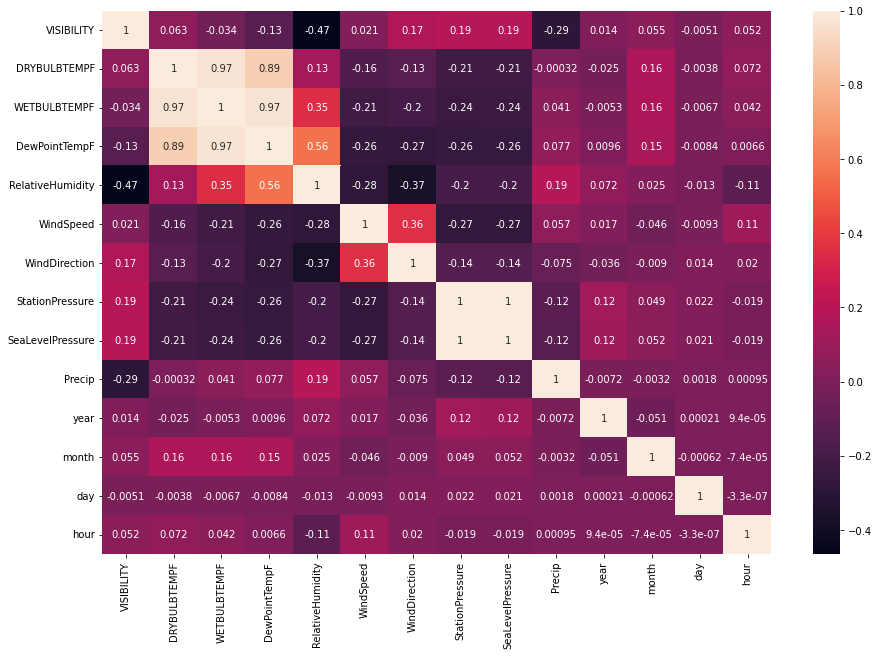

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


In [9]:
##Using k-means clustering

from sklearn.decomposition import PCA

pca = PCA(n_components=14)
data = pca.fit_transform(df.drop(['DATE'],axis=1))
pc = pd.DataFrame(data=data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])

In [10]:
pc.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,196.060286,35.766154,-26.550937,-10.848586,-5.099162,-4.617918,4.568045,1.417043,0.856093,0.752971,1.694868,0.101325,-0.008690,-0.005122
1,196.429611,33.485410,-29.952795,-9.625059,-5.191234,-4.616430,4.578042,1.405665,0.841599,1.477580,1.453935,0.089077,-0.000358,-0.004580
2,196.431900,33.474965,-29.943347,-8.639361,-5.374607,-4.650281,4.718831,1.758220,1.705168,1.169950,1.360471,0.076092,-0.004178,-0.004151
3,196.430532,33.470175,-29.879867,-7.668093,-5.603782,-4.645179,4.721795,1.757673,1.704597,1.166258,1.364498,0.104354,-0.004358,-0.004064
4,196.058487,35.741459,-26.350964,-6.949235,-5.970689,-4.636201,4.716991,1.767862,1.717459,0.434124,1.611963,0.137891,-0.003023,-0.011802


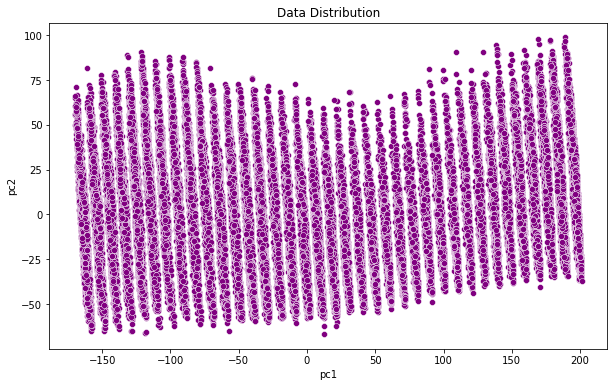

In [11]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=pc,x='pc1',y='pc2',color='purple')
plt.title('Data Distribution')
plt.savefig('count8.png')
     

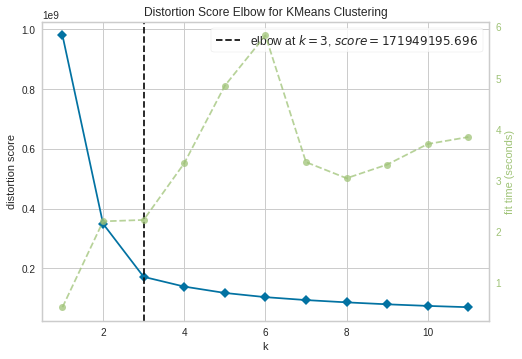

<Figure size 576x396 with 0 Axes>

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(pc)
visualizer.show()
plt.savefig('count9.png')

Observation

Chossing 3 as value of k

In [13]:
# training the model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)
     

KMeans(n_clusters=3)

In [14]:
# predicting the clusters
np.random.seed(42)
preds = kmeans.predict(pc)
     

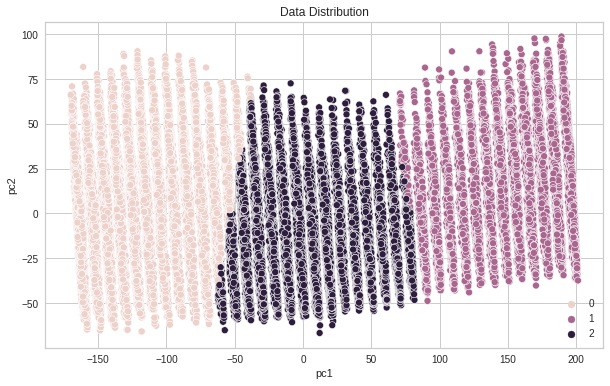

In [15]:
# plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pc['pc1'],y=pc['pc2'],hue=preds)
plt.title('Data Distribution')
plt.savefig('count10.png')
plt.show()
     
     

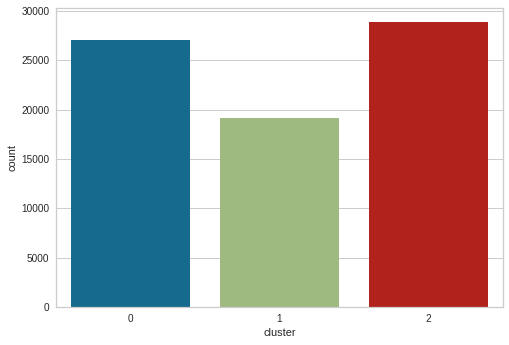

In [16]:

df['cluster'] = preds

sns.countplot(x = df['cluster'])
plt.savefig('count11.png')

In [18]:
df['cluster'].value_counts()/len(df)*100


2    38.480082
0    36.045443
1    25.474475
Name: cluster, dtype: float64

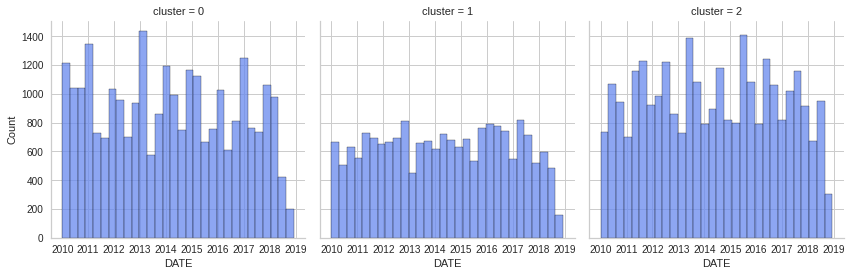

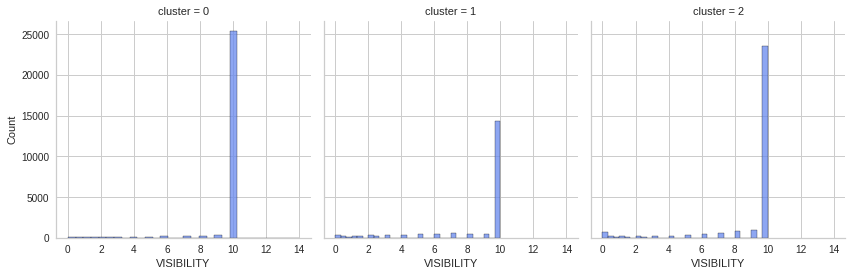

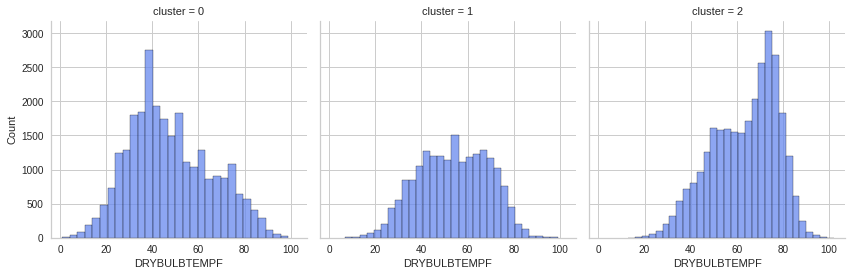

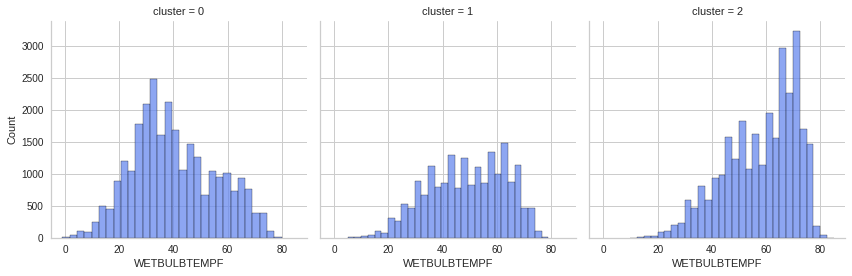

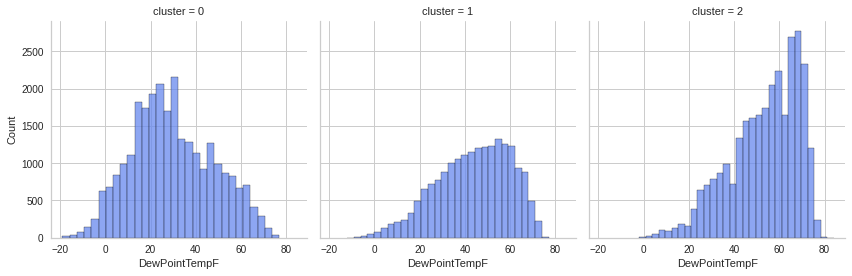

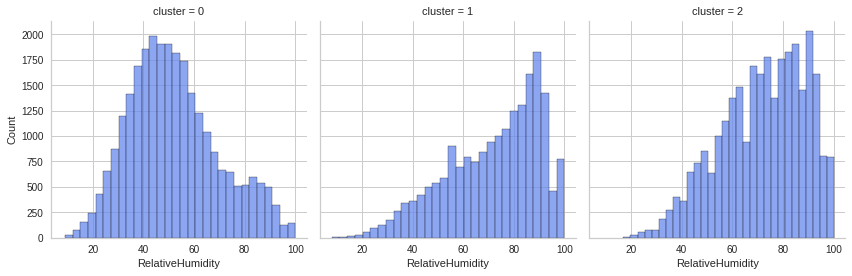

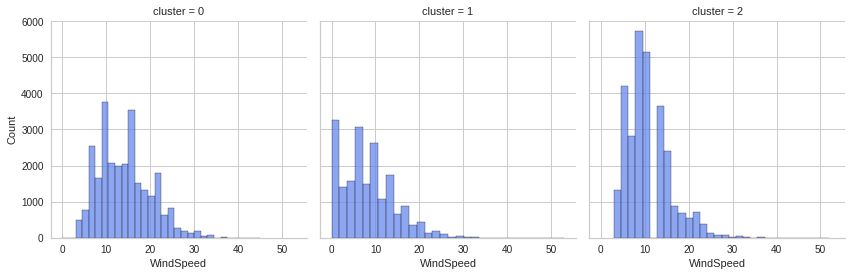

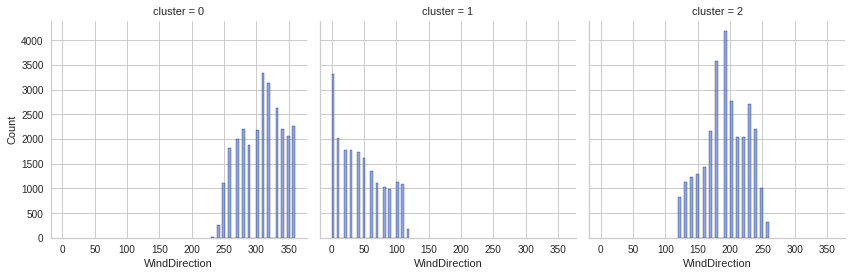

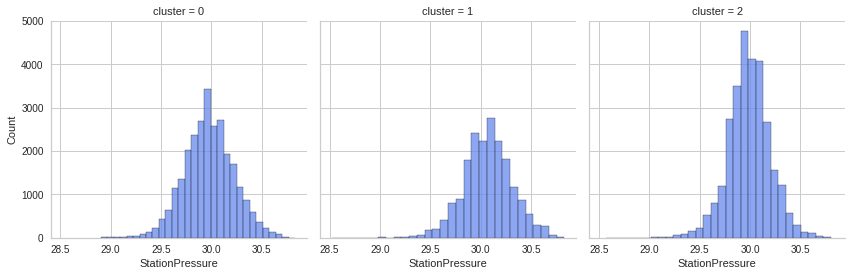

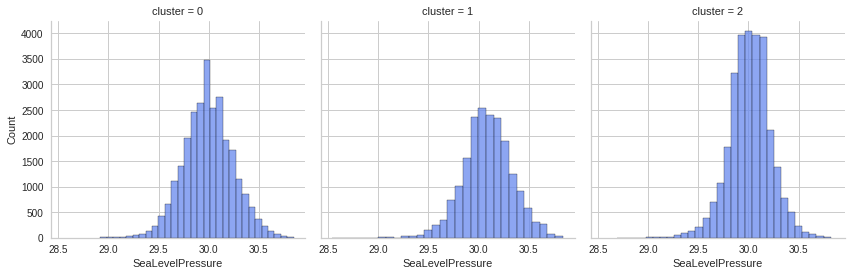

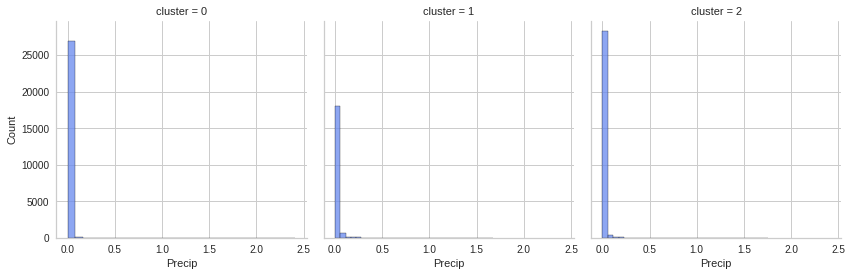

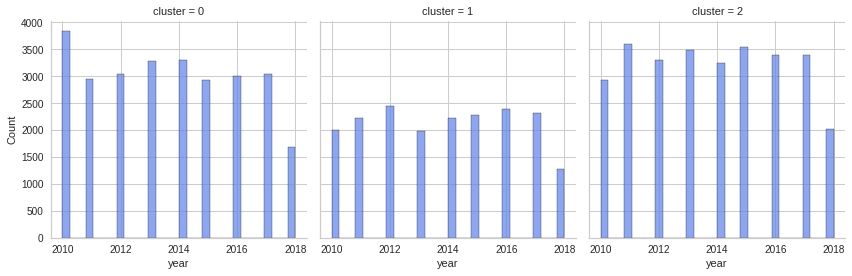

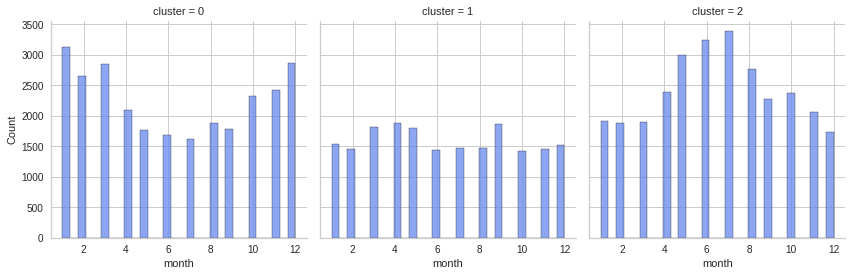

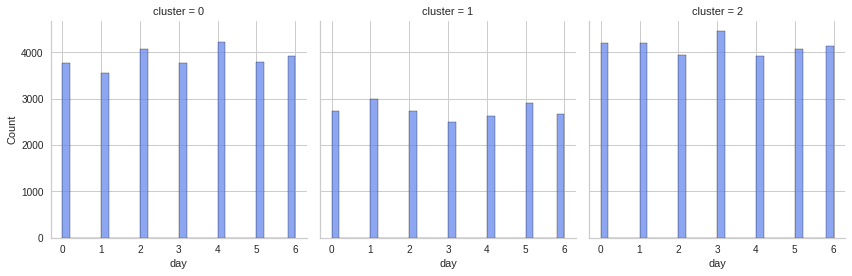

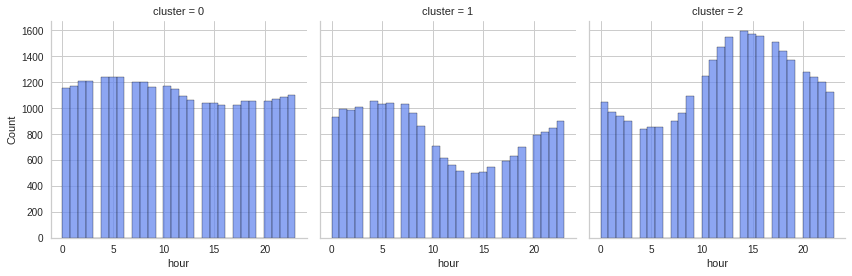

In [17]:
sns.set_palette('coolwarm')
for i in df.drop(['cluster'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='cluster')
  grid = grid.map(sns.histplot,i,bins=30)
plt.show()
     